In [1]:
# Packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

import wrangle

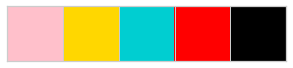

In [2]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']
# Set your custom color palette
my_pal = sns.color_palette(heat)
sns.palplot(my_pal)

In [3]:
# acquire data
df = pd.read_csv("train_maybe_final.csv")

In [4]:
df.shape

(5513024, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513024 entries, 0 to 5513023
Data columns (total 20 columns):
Unnamed: 0         int64
Unnamed: 0.1       int64
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
num_correct        float64
num_incorrect      float64
accuracy           float64
accuracy_group     float64
date               object
hour               int64
weekday            object
dtypes: float64(4), int64(6), object(10)
memory usage: 841.2+ MB


In [6]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,0,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,1,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,2,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,3,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,4,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [7]:
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

In [8]:
df = df[df.world != "NONE"]

In [9]:
agg = df.groupby(['installation_id','world'])[['game_session']].count()

In [10]:
agg

game_session
installation_id world                     
0006a69f        MAGMAPEAK              725
                TREETOPCITY           1878
0006c192        CRYSTALCAVES           204
                MAGMAPEAK             1336
                TREETOPCITY            664
...                                    ...
ffc90c32        TREETOPCITY            684
ffd2871d        MAGMAPEAK              927
ffeb0b1b        CRYSTALCAVES           944
                MAGMAPEAK              534
                TREETOPCITY            112

[8185 rows x 1 columns]

In [11]:
agg = agg.reset_index()

In [12]:
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()

In [13]:
agg.columns = ['installation_id', 'Crystalcaves', 'Magamapeak', 'Treetopcity']

In [14]:
agg.set_index('installation_id', inplace = True)

In [15]:
agg.to_csv('practice_counts.csv')

Text(0.5, 1.0, 'What are the usage distributions (ratio) for each world?')

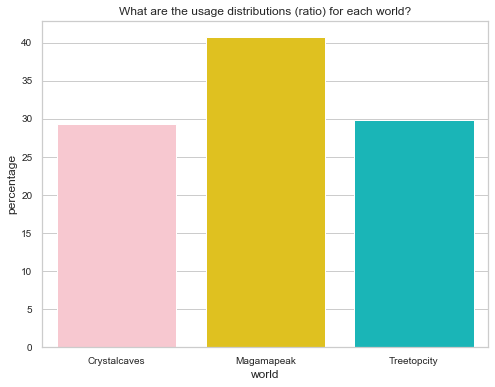

In [16]:
plt.figure(figsize=(8,6))

c = agg.sum(axis = 0)
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
pcts.columns = ['world', 'percentage']
(sns.barplot(x = "world" , y="percentage", data=pcts, palette=my_pal))
#plt.legend(title='World', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("What are the usage distributions (ratio) for each world?")

# Magamapeak > most frequently visited world 

In [17]:
agg.sort_values(by = ['Magamapeak','Treetopcity','Crystalcaves'], ascending = False, inplace = True)

In [18]:
agg = agg.reset_index()

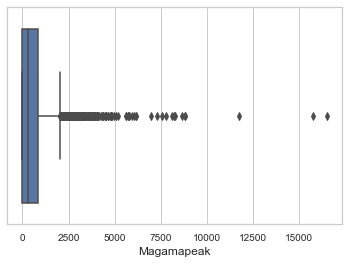

In [41]:
sns.boxplot(agg.Magamapeak)

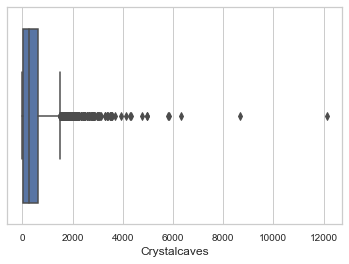

In [42]:
sns.boxplot(agg.Crystalcaves)

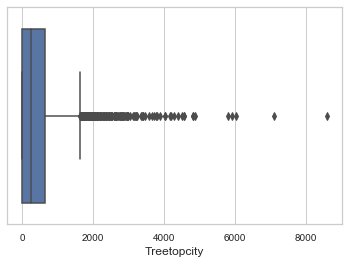

In [43]:
sns.boxplot(agg.Treetopcity)

In [28]:
agg.Crystalcaves.median()

258.0

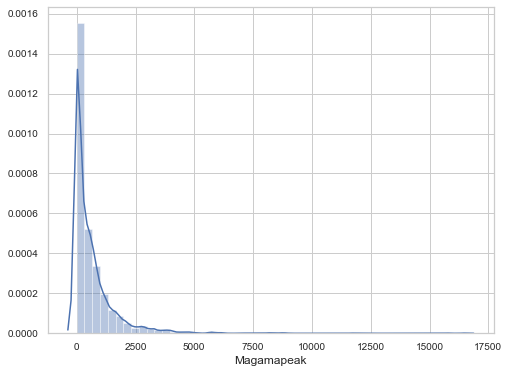

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(agg.Magamapeak)

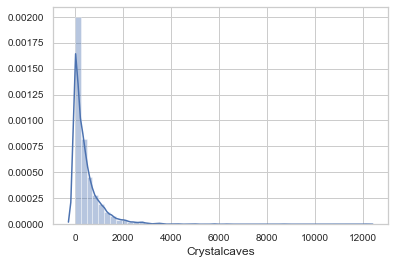

In [35]:
sns.distplot(agg.Crystalcaves)

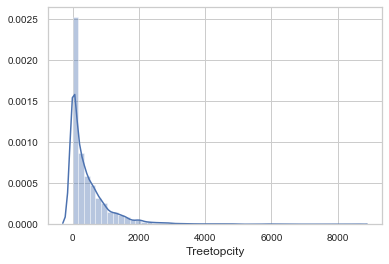

In [36]:
sns.distplot(agg.Treetopcity)

In [52]:
(df.groupby(["world","type"])["game_session"].count())

world         type      
CRYSTALCAVES  Activity       358980
              Assessment     288231
              Clip            21834
              Game           944823
MAGMAPEAK     Activity       994084
              Assessment     143216
              Clip            11703
              Game          1097999
TREETOPCITY   Activity       705527
              Assessment     308534
              Clip            24635
              Game           608150
Name: game_session, dtype: int64

Text(0.5, 1.0, 'What are the most visited engagement types in the game?')

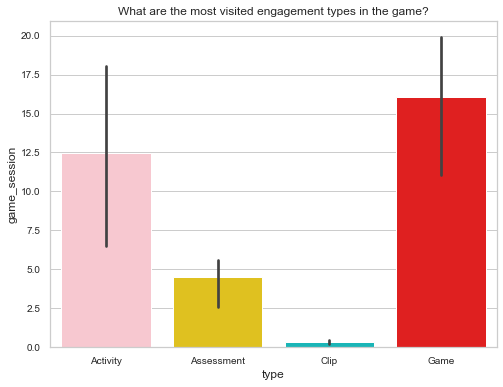

In [57]:
plt.figure(figsize=(8,6))

c = (df.groupby(["world","type"])["game_session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "type" , y="game_session", data=pcts, palette=my_pal))

plt.title("What are the most visited engagement types in the game?")

# overall, games and activities are much more used than assessments

In [91]:
# top 5 most played missions
pcts[pcts.game_session >= 4.5].sort_values('game_session', ascending = False)

,world,type,title,game_session
15,MAGMAPEAK,Activity,Bottle Filler (Activity),8.694239
25,MAGMAPEAK,Game,Scrub-A-Dub,7.748203
11,CRYSTALCAVES,Game,Chow Time,7.152420
16,MAGMAPEAK,Activity,Sandcastle Builder (Activity),6.460046
27,TREETOPCITY,Activity,Fireworks (Activity),4.768528


Text(0.5, 1.0, 'The most used missions in each world & engagement type (only showing record of >3.5% usage)?')

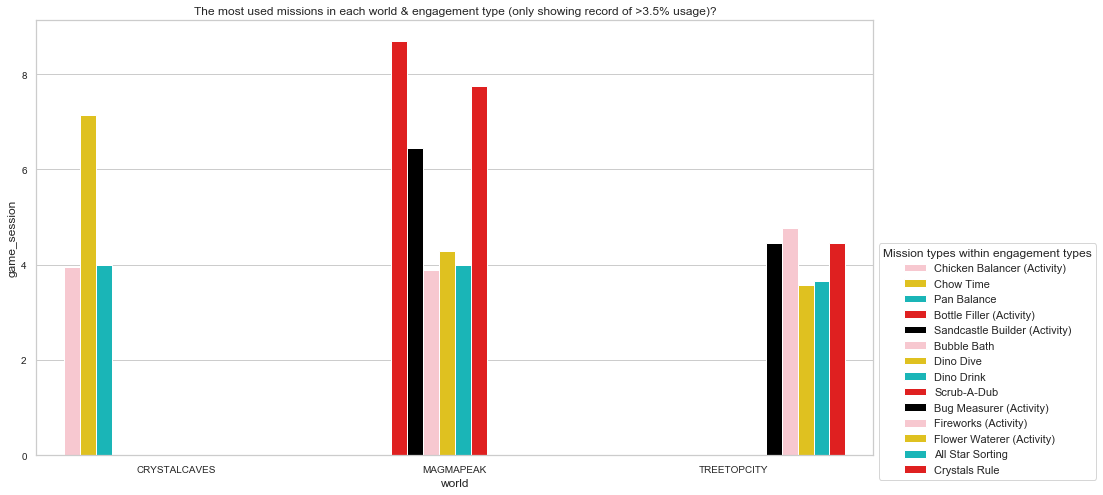

In [125]:
plt.figure(figsize=(15,8))

c = (df.groupby(["world", "type", "title"])["game_session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
pcts = pcts[pcts.game_session >= 3.5]
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "world" , y="game_session", data=pcts,  hue = "title",palette=my_pal))
plt.legend(title='Mission types within engagement types', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title("The most used missions in each world & engagement type (only showing record of >3.5% usage)?")


In [64]:
df.groupby(['installation_id','game_session']).event_id.count()

installation_id  game_session    
0006a69f         0336db4dee65ad4b    131
                 05921a6eb858eeba     84
                 09fd0cc02e6ee5f4      1
                 1623f262016185e4     64
                 1dd51df3dd28e7e0      1
                                    ... 
ffeb0b1b         e96910064986ea78     76
                 ead68f52fcce38ff      1
                 ee35ad382b29b3e0      1
                 f88dc29664b912a3    604
                 fafc3deda44d80dc      1
Name: event_id, Length: 119714, dtype: int64

In [66]:
df.groupby(['installation_id','world']).game_session.count()

installation_id  world       
0006a69f         MAGMAPEAK        725
                 TREETOPCITY     1878
0006c192         CRYSTALCAVES     204
                 MAGMAPEAK       1336
                 TREETOPCITY      664
                                 ... 
ffc90c32         TREETOPCITY      684
ffd2871d         MAGMAPEAK        927
ffeb0b1b         CRYSTALCAVES     944
                 MAGMAPEAK        534
                 TREETOPCITY      112
Name: game_session, Length: 8185, dtype: int64

In [68]:
df.groupby(['installation_id','world','type']).game_session.count()

installation_id  world        type      
0006a69f         MAGMAPEAK    Activity      320
                              Clip            5
                              Game          400
                 TREETOPCITY  Activity      890
                              Assessment    261
                                           ... 
ffeb0b1b         MAGMAPEAK    Activity      381
                              Assessment    150
                              Clip            3
                 TREETOPCITY  Assessment     97
                              Clip           15
Name: game_session, Length: 26736, dtype: int64

In [69]:
df.groupby(['installation_id','world','type','game_session']).event_id.count()

installation_id  world        type      game_session    
0006a69f         MAGMAPEAK    Activity  2b9d5af79bcdb79f    102
                                        7a4ee0624abb5ef8    109
                                        a63e30931510b96b     59
                                        aba85d9249eb9189     50
                              Clip      343d01f40e4616dc      1
                                                           ... 
ffeb0b1b         TREETOPCITY  Clip      ccc7fd9606733f83      1
                                        cd4fd86f2c34b139      1
                                        ead68f52fcce38ff      1
                                        ee35ad382b29b3e0      1
                                        fafc3deda44d80dc      1
Name: event_id, Length: 119714, dtype: int64

In [70]:
df.groupby(['installation_id','world','type','game_session']).event_count.value_counts()

installation_id  world        type      game_session      event_count
0006a69f         MAGMAPEAK    Activity  2b9d5af79bcdb79f  1              1
                                                          2              1
                                                          3              1
                                                          4              1
                                                          5              1
                                                                        ..
ffeb0b1b         TREETOPCITY  Clip      ccc7fd9606733f83  1              1
                                        cd4fd86f2c34b139  1              1
                                        ead68f52fcce38ff  1              1
                                        ee35ad382b29b3e0  1              1
                                        fafc3deda44d80dc  1              1
Name: event_count, Length: 5507716, dtype: int64

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_id.value_counts()

In [112]:
df['game_time_min'] = (df.game_time/60000)

In [117]:
df_no_clip = df[df.type!= 'Clip']

In [ ]:
df.groupby(['world','type']).title.count().to_frame()

In [118]:
pd.pivot_table(df_no_clip, values = ["game_time_min"], index=["world", "type", "title"], aggfunc=[np.sum, np.mean, np.median])

sum  \
                                                      game_time_min   
world        type       title                                         
CRYSTALCAVES Activity   Chicken Balancer (Activity)    5.001112e+05   
                        Egg Dropper (Activity)         3.918205e+05   
             Assessment Cart Balancer (Assessment)     9.944733e+04   
                        Chest Sorter (Assessment)      1.597651e+05   
             Game       Chow Time                      1.324435e+06   
                        Happy Camel                    3.727612e+05   
                        Leaf Leader                    3.042828e+05   
                        Pan Balance                    6.820357e+05   
MAGMAPEAK    Activity   Bottle Filler (Activity)       2.344004e+06   
                        Sandcastle Builder (Activity)  6.570895e+05   
                        Watering Hole (Activity)       3.384848e+05   
             Assessment Cauldron Filler (Assessment)   1.546218e+05   
             Game       Bubble Bath                    8.748727e+05   
                        Dino Dive                      6.744133e+05   
                        Dino Drink                     6.150698e+05   
                        Scrub-A-Dub                    1.713495e+06   
TREETOPCITY  Activity   Bug Measurer (Activity)        3.883520e+05   
                        Fireworks (Activity)           5.464114e+05   
                        Flower Waterer (Activity)      5.518247e+05   
             Assessment Bird Measurer (Assessment)     2.592613e+05   
                        Mushroom Sorter (Assessment)   1.079762e+05   
             Game       Air Show                       3.649794e+05   
                        All Star Sorting               6.869115e+05   
                        Crystals Rule                  6.783497e+05   

                                                               mean  \
                                                      game_time_min   
world        type       title                                         
CRYSTALCAVES Activity   Chicken Balancer (Activity)        2.299246   
                        Egg Dropper (Activity)             2.769656   
             Assessment Cart Balancer (Assessment)         0.745683   
                        Chest Sorter (Assessment)          1.031628   
             Game       Chow Time                          3.362064   
                        Happy Camel                        2.030865   
                        Leaf Leader                        2.065889   
                        Pan Balance                        3.099444   
MAGMAPEAK    Activity   Bottle Filler (Activity)           4.895029   
                        Sandcastle Builder (Activity)      1.846789   
                        Watering Hole (Activity)           2.123107   
             Assessment Cauldron Filler (Assessment)       1.079641   
             Game       Bubble Bath                        4.074007   
                        Dino Dive                          2.850389   
                        Dino Drink                         2.797031   
                        Scrub-A-Dub                        4.015230   
TREETOPCITY  Activity   Bug Measurer (Activity)            1.580318   
                        Fireworks (Activity)               2.080482   
                        Flower Waterer (Activity)          2.799052   
             Assessment Bird Measurer (Assessment)         1.700174   
                        Mushroom Sorter (Assessment)       0.691964   
             Game       Air Show                           2.262919   
                        All Star Sorting                   3.416739   
                        Crystals Rule                      2.759538   

                                                             median  
                                                      game_time_min  
world        type       title                                        
CRYSTALCAVES Activ

In [ ]:
# if game_time << game_time median for particular mission, do something so we don't include click arounds

In [96]:
user_result = pd.crosstab(df.installation_id, df.accuracy_group)

In [98]:
user_nail_rate = pd.DataFrame(df.groupby("installation_id")["accuracy"].median())

In [99]:
user_type = pd.crosstab(df.installation_id, df.type)

In [100]:
exp_eepd = pd.concat([user_type, user_result, user_nail_rate], axis = 1)

In [101]:
# filter random:
# among all data and the various "learning" items of
# "Activity", "Clip", "Game"
# if  participate in none > 
# if participate in at least 1/ 2 > then?
# how does that compare to participate all three?

# next need to consider time component,
# finding the order of EEPD
exp_eepd

,Activity,Assessment,Clip,Game,0.0,1.0,2.0,3.0,accuracy
installation_id,,,,,,,,,
0006a69f,1210,261,24,1108,87,0,42,115,0.500000
0006c192,1198,341,25,640,115,0,199,24,0.500000
00129856,0,43,0,0,0,0,0,40,1.000000
001d0ed0,12,200,18,175,79,0,64,49,0.500000
00225f67,208,64,9,355,36,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...
ff9305d7,670,463,11,910,138,257,0,0,0.076923
ff9715db,909,358,16,653,75,47,30,206,1.000000
ffc90c32,479,242,25,1254,0,62,0,180,1.000000


In [102]:
exp_eepd["nActivity"] = exp_eepd.Activity.apply(lambda x: 1 if x > 0 else 0)
exp_eepd["nClip"] = exp_eepd.Clip.apply(lambda x: 1 if x > 0 else 0)
exp_eepd["nGame"] = exp_eepd.Game.apply(lambda x: 1 if x > 0 else 0)

In [103]:
exp_eepd["sum_engage"] = exp_eepd.nActivity + exp_eepd.nClip + exp_eepd.nGame

Text(0.5, 0, 'Number of engagement types')

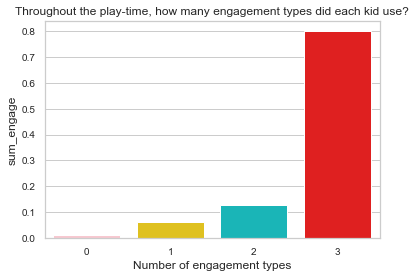

In [128]:
plot = exp_eepd.sum_engage.value_counts(normalize = True).to_frame().reset_index()
(sns.barplot(x = "index" , y="sum_engage", data=plot, palette=my_pal))
plt.title("Throughout the play-time, how many engagement types did each kid use?")
plt.xlabel("Number of engagement types")

In [129]:
syllabus = pd.read_csv("media_sequence.csv")

In [130]:
syllabus.shape

(44, 4)

In [131]:
syllabus["order"] = range(1, 45)

In [133]:
syllabus.head()

,title,type,duration (same as df),duration (s),order
0,Welcome to Lost Lagoon!,Clip,19000,19.0,1
1,Tree Top City - Level 1,Clip,17000,17.0,2
2,Ordering Spheres,Clip,61000,61.0,3
3,All Star Sorting,Game,0,NaN,4
4,Costume Box,Clip,61000,61.0,5


In [134]:
# merge main dataframe with "syllabus"
exp_eepd2 =  (df
              .merge(syllabus, how = 'left', left_on = "title", right_on = "title")
              .set_index(["installation_id", "timestamp"]))

In [135]:
median = exp_eepd2.groupby(["installation_id"]).accuracy.median().reset_index()

In [136]:
exp_eepd2 = (exp_eepd2
             .reset_index()
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id", "timestamp"]))

In [138]:
exp_eepd2.head()

event_id      game_session  \
installation_id timestamp                                                      
0006a69f        2019-08-06 04:57:45.301000+00:00  27253bdc  4b57c9a59474a1b9   
                2019-08-06 04:58:14.538000+00:00  77261ab5  2b9d5af79bcdb79f   
                2019-08-06 04:58:14.615000+00:00  b2dba42b  2b9d5af79bcdb79f   
                2019-08-06 04:58:16.680000+00:00  1325467d  2b9d5af79bcdb79f   
                2019-08-06 04:58:18.474000+00:00  1325467d  2b9d5af79bcdb79f   

                                                  event_count  event_code  \
installation_id timestamp                                                   
0006a69f        2019-08-06 04:57:45.301000+00:00            1        2000   
                2019-08-06 04:58:14.538000+00:00            1        2000   
                2019-08-06 04:58:14.615000+00:00            2        3010   
                2019-08-06 04:58:16.680000+00:00            3        4070   
                2019-08-06 04:58:18.474000+00:00            4        4070   

                                                  game_time  \
installation_id timestamp                                     
0006a69f        2019-08-06 04:57:45.301000+00:00          0   
                2019-08-06 04:58:14.538000+00:00          0   
                2019-08-06 04:58:14.615000+00:00         29   
                2019-08-06 04:58:16.680000+00:00       2137   
                2019-08-06 04:58:18.474000+00:00       3937   

                                                                          title  \
installation_id timestamp                                                         
0006a69f        2019-08-06 04:57:45.301000+00:00           Magma Peak - Level 1   
                2019-08-06 04:58:14.538000+00:00  Sandcastle Builder (Activity)   
                2019-08-06 04:58:14.615000+00:00  Sandcastle Builder (Activity)   
                2019-08-06 04:58:16.680000+00:00  Sandcastle Builder (Activity)   
                2019-08-06 04:58:18.474000+00:00  Sandcastle Builder (Activity)   

                                                    type_x      world  \
installation_id timestamp                                               
0006a69f        2019-08-06 04:57:45.301000+00:00      Clip  MAGMAPEAK   
                2019-08-06 04:58:14.538000+00:00  Activity  MAGMAPEAK   
                2019-08-06 04:58:14.615000+00:00  Activity  MAGMAPEAK   
                2019-08-06 04:58:16.680000+00:00  Activity  MAGMAPEAK   
                2019-08-06 04:58:18.474000+00:00  Activity  MAGMAPEAK   

                                                  num_correct  num_incorrect  \
installation_id timestamp                                                      
0006a69f        2019-08-06 04:57:45.301000+00:00          NaN            NaN   
                2019-08-06 04:58:14.538000+00:00          NaN            NaN   
                2019-08-06 04:58:14.615000+00:00          NaN            NaN   
                2019-08-06 04:58:16.680000+00:00          NaN            NaN   
                2019-08-06 04:58:18.474000+00:00          NaN            NaN   

                                                  accuracy_x  accuracy_group  \
installation_id timestamp                                                      
0006a69f        2019-08-06 04:57:45.301000+00:00         NaN             NaN   
                2019-08-06 04:58:14.538000+00:00         NaN             NaN   
                2019-08-06 04:58:14.615000+00:00         NaN             NaN   
                2019-08-06 04:58:16.680000+00:00         NaN             NaN   
                2019-08-06 04:58:18.474000+00:00         NaN             NaN   

                                                  game_time_min    type_y  \
installation_id timestamp                                                   
0006a69f        2019-08-06 04:57:45.301000+00:00       0.000000      Clip   
                2019-08-06 04:58:14.538000+00:00       0.000

In [139]:
exp_eepd2["accuracy"] = np.where(exp_eepd2.accuracy_x.isna(), exp_eepd2.accuracy_y, exp_eepd2.accuracy_x)
#df['c2'] = np.where(df.c1 == 8,'X',df.c3)

In [142]:
from linear_random import *

In [143]:
path = exp_eepd2.groupby('installation_id').order.apply(is_list_sorted).reset_index()

In [144]:
path

,installation_id,order
0,0006a69f,False
1,0006c192,False
2,00129856,True
3,001d0ed0,True
4,00225f67,True
...,...,...
3518,ff9305d7,False
3519,ff9715db,False
3520,ffc90c32,True
3521,ffd2871d,True


In [145]:
print(f"The percentage of kids who follow linear learning path: {round(path.mean(),2)*100}%")

The percentage of kids who follow linear learning path: order    27.0
dtype: float64%


In [146]:
path = path.merge(exp_eepd2.accuracy, how = "left", left_on = "installation_id", right_on = "installation_id")

In [147]:
path = path.groupby(["installation_id","order"]).median().reset_index()

In [148]:
path.groupby("order").accuracy.median()

order
False    0.5
True     0.5
Name: accuracy, dtype: float64

In [149]:
path["order_"] = np.where(path.order == True, "Linear", "Non-linear")

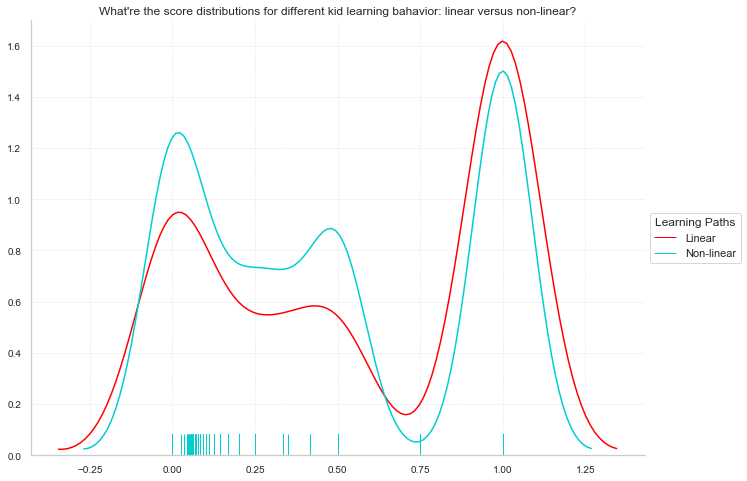

In [154]:
# Sort the dataframe by target
target_0 = path.loc[path['order_'] == "Linear"]
target_1 = path.loc[path['order_'] == "Non-linear"]

sns.distplot(target_0[['accuracy']], hist=False, rug=True, color = 'red')
sns.distplot(target_1[['accuracy']], hist=False, rug=True, color = 'darkturquoise')

plt.legend(title='Learning Paths', labels = ["Linear", "Non-linear"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

plt.show()

In [155]:
path.groupby("order").accuracy.value_counts()

order  accuracy
False  1.000000    868
       0.000000    635
       0.500000    461
       0.333333    207
       0.250000    134
       0.200000     69
       0.166667     48
       0.142857     36
       0.125000     19
       0.111111     17
       0.100000     16
       0.090909      9
       0.083333      7
       0.076923      6
       0.071429      5
       0.066667      4
       0.750000      3
       0.043478      2
       0.055556      2
       0.058824      2
       0.062500      2
       0.416667      2
       0.024390      1
       0.034483      1
       0.047619      1
       0.050000      1
       0.052632      1
       0.350000      1
True   1.000000    452
       0.000000    236
       0.500000    126
       0.333333     60
       0.250000     40
       0.200000     16
       0.166667     14
       0.125000      5
       0.111111      3
       0.076923      2
       0.083333      2
       0.090909      2
       0.142857      2
       0.050000      1
       0.055556   

In [ ]:
sns.swarmplot(x="order_", y="accuracy", data=path, palette = my_pal[2:4])
plt.xlabel('Learning behaviors')
plt.title("Is there a different accuracy distribution between kids that demonstrate different learning behavior?")

In [160]:
df.type

1                Clip
2            Activity
3            Activity
4            Activity
5            Activity
              ...    
5513019    Assessment
5513020    Assessment
5513021    Assessment
5513022    Assessment
5513023    Assessment
Name: type, Length: 5507716, dtype: object

In [162]:
df[df.type == 'Assessment'].groupby(["world","title"]).accuracy.median()

world         title                       
CRYSTALCAVES  Cart Balancer (Assessment)      0.5
              Chest Sorter (Assessment)       0.0
MAGMAPEAK     Cauldron Filler (Assessment)    1.0
TREETOPCITY   Bird Measurer (Assessment)      0.2
              Mushroom Sorter (Assessment)    1.0
Name: accuracy, dtype: float64

In [163]:
df[df.type == 'Assessment'].groupby(["world","title"]).accuracy.mean()

world         title                       
CRYSTALCAVES  Cart Balancer (Assessment)      0.584230
              Chest Sorter (Assessment)       0.181272
MAGMAPEAK     Cauldron Filler (Assessment)    0.659062
TREETOPCITY   Bird Measurer (Assessment)      0.327002
              Mushroom Sorter (Assessment)    0.634529
Name: accuracy, dtype: float64

In [165]:
df[df.type == 'Assessment'].groupby(["world","title"]).installation_id.count()

world         title                       
CRYSTALCAVES  Cart Balancer (Assessment)      133364
              Chest Sorter (Assessment)       154867
MAGMAPEAK     Cauldron Filler (Assessment)    143216
TREETOPCITY   Bird Measurer (Assessment)      152491
              Mushroom Sorter (Assessment)    156043
Name: installation_id, dtype: int64